In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df_raw = spark.read.csv('SeoulBikeData.csv', header=True, inferSchema=True)
df_raw_pandas = df_raw.toPandas()
#df_raw_pandas['Month'] = df_raw_pandas['Date'][0:3]
df_raw_pandas['Date'] = pd.to_datetime(df_raw_pandas['Date'],format="%d/%m/%Y")

df_raw_pandas['Year']=df_raw_pandas['Date'].apply(lambda x:x.strftime('%Y'))
df_raw_pandas['Month']=df_raw_pandas['Date'].apply(lambda x:x.strftime('%m'))
df_raw_pandas['Year-month'] = df_raw_pandas['Year'] + df_raw_pandas['Month']
print(df_raw_pandas)

           Date  Rented Bike Count  Hour  Temperature(��)  Humidity(%)  \
0    2017-12-01                254     0             -5.2           37   
1    2017-12-01                204     1             -5.5           38   
2    2017-12-01                173     2             -6.0           39   
3    2017-12-01                107     3             -6.2           40   
4    2017-12-01                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(��)  \
0                  2.2              2000

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import seaborn as sn
import warnings
from sklearn.exceptions import DataConversionWarning
from yellowbrick.regressor import ManualAlphaSelection
from yellowbrick.regressor import AlphaSelection
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing

warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
%matplotlib inline

In [5]:
df_raw_pandas['Date'] = pd.to_datetime(df_raw_pandas['Date'], errors='coerce')
df=df_raw_pandas

In [6]:
df['WeekDay']=df['Date'].dt.day_name()
df['Month']=df['Date'].dt.month
mapping_dictDay={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
df['WeekDayEncoding']=df['WeekDay'].map(mapping_dictDay)

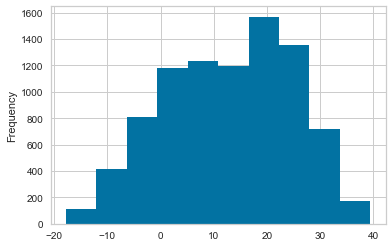

In [7]:
df['Temperature(��)'].plot(kind='hist')
plt.show()

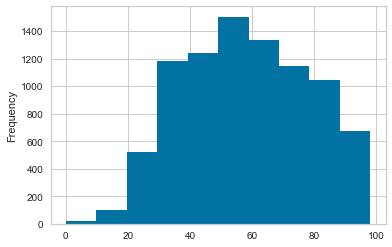

In [8]:
df['Humidity(%)'].plot(kind='hist')
plt.show()

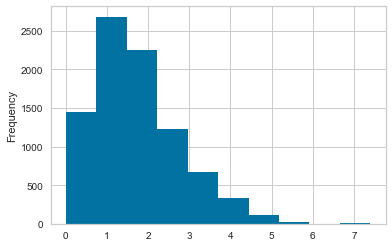

In [9]:
df['Wind speed (m/s)'].plot(kind='hist')
plt.show()

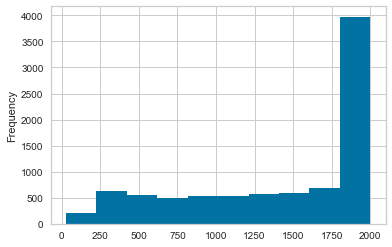

In [10]:
df['Visibility (10m)'].plot(kind='hist')
plt.show()

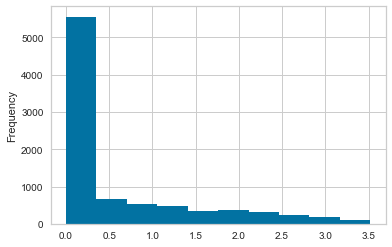

In [11]:
df['Solar Radiation (MJ/m2)'].plot(kind='hist')
plt.show()

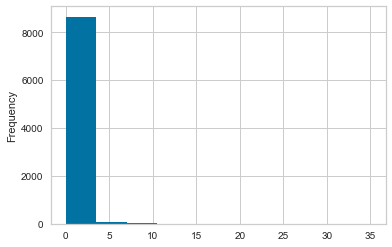

In [12]:
df['Rainfall(mm)'].plot(kind='hist')
plt.show()

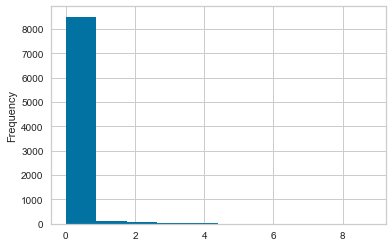

In [13]:
df['Snowfall (cm)'].plot(kind='hist')
plt.show()

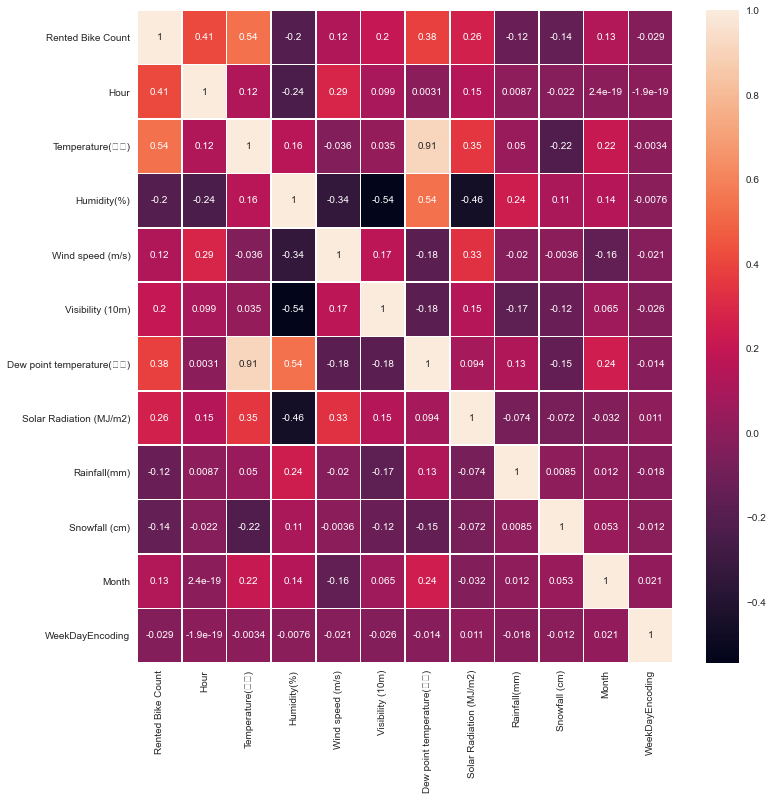

In [14]:
df.skew().sort_values(ascending=True)
corrMatrix = df.corr()

fig, ax = plt.subplots(figsize=(12,12)) # Sample figsize in inches
sn.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

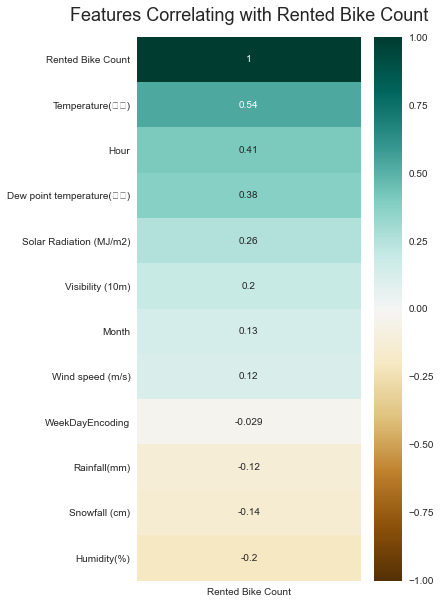

In [15]:
plt.figure(figsize=(5, 10))
heatmap = sn.heatmap(corrMatrix[['Rented Bike Count']].sort_values(by='Rented Bike Count', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Rented Bike Count', fontdict={'fontsize':18}, pad=16);